In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import scipy
import GPy
import plot

In [3]:
import importlib
importlib.reload(plot)

<module 'plot' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/plot.py'>

# Fisher's geometric model 

In [132]:
p = 20
d = 2

In [133]:
mu_pi = scipy.stats.lognorm(s=.4, scale=1)

mu = mu_pi.rvs(size=d)
mu

array([1.5345501 , 0.59413802])

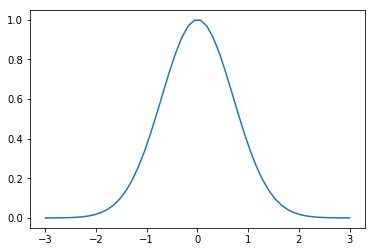

In [153]:
def rbf(z, lengthscale, mu=None):
    n, p = z.shape
    
    if mu is None:
        mu = np.zeros((1, p))
        
    diff = np.power(z-mu, 2)/lengthscale[None, :]
    return np.exp(-diff.sum(1))

z = np.linspace(-3, 3)[:, None]
plt.plot(z, rbf(z, np.ones(1)))

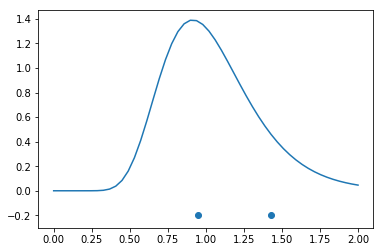

In [169]:
ls_pi = scipy.stats.lognorm(s=.3, scale=1)
lengthscale=ls_pi.rvs(size=2)

z = np.linspace(0, 2)
plt.plot(z, ls_pi.pdf(z))
plt.scatter(lengthscale, [-.2]*2)

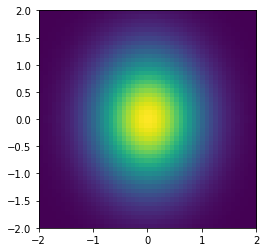

In [170]:
z = np.linspace(-2, 2)[:, None]
plt.imshow(
    rbf(np.column_stack((zz.ravel() for zz in np.meshgrid(z, z))), lengthscale).reshape(50, 50),
    extent = (z.min(), z.max(), z.min(), z.max())
)

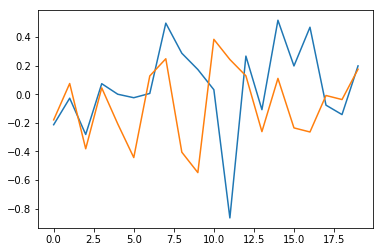

In [171]:
beta_pi = scipy.stats.norm(scale=.3)
beta = beta_pi.rvs(size=d*p).reshape((p,d)) - .05*mu[None, :]
plt.plot(beta)

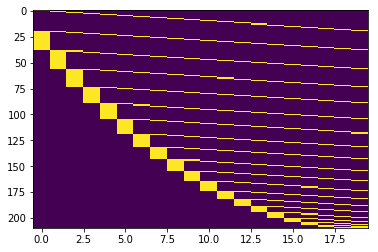

In [172]:
design = np.zeros((p, p + int(p*(p-1)/2)))

design[:,:p] = np.eye(p)

k = p
for i in range(p):
    for j in range(i+1, p):
        design[i, k] = 1
        design[j, k] = 1
        k += 1
        

plt.imshow(design.T, aspect='auto')

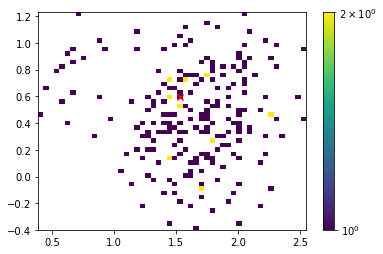

In [173]:
phens = design.T.dot(beta) + mu[None, :]
plot.scatterHeatmap(phens[:,0], phens[:,1])
plt.scatter([mu[0]], [mu[1]], marker='x', color='r')

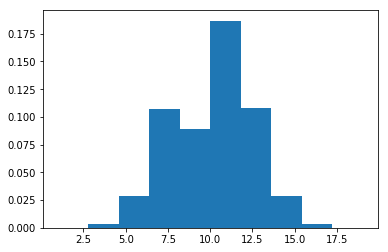

In [182]:
gen_pi = scipy.stats.bernoulli(np.array([.5]*p))

gens = gen_pi.rvs(size=(100000, p))
plt.hist(gens.sum(1), density=True);

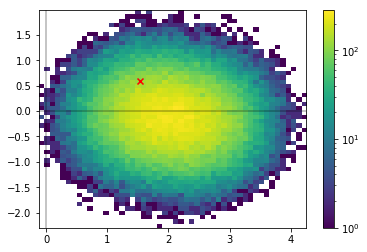

In [183]:
phens = gens.dot(beta) + mu[None, :]
plot.scatterHeatmap(phens[:,0], phens[:,1])
plt.scatter([mu[0]], [mu[1]], marker='x', color='r')

plt.axhline(0, color='k', alpha=.3)
plt.axvline(0, color='k', alpha=.3)

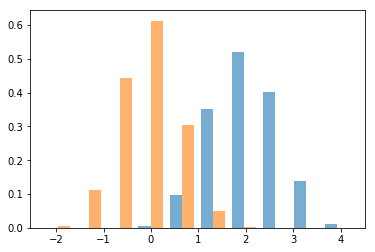

In [184]:
plt.hist(phens, density=True, alpha=.6);

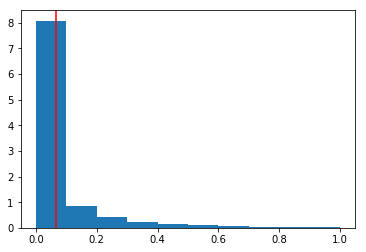

In [185]:
plt.hist(rbf(phens, lengthscale), density=True);
plt.axvline(rbf(mu[None,:], lengthscale), color='r')